# SI 618 - Homework #4: Visualization, Correlation, and Linear Models

Version 2022.02.07.1.CT

## We will be using two different datasets for the two different parts of this homework. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

### <span style="color:magenta">  Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes for </span>

* Plot histograms for these metrics *for Canada*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for Canada*, as we did in this week's class. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [3]:
canada = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/archive/CAvideos.csv")
unitedstates = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/archive/USvideos.csv")
britain = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/archive/GBvideos.csv")
germany = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/archive/DEvideos.csv")
france = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/archive/FRvideos.csv")

count    4.088100e+04
mean     5.042975e+03
std      2.157902e+04
min      0.000000e+00
25%      4.170000e+02
50%      1.301000e+03
75%      3.713000e+03
max      1.114800e+06
Name: comment_count, dtype: float64


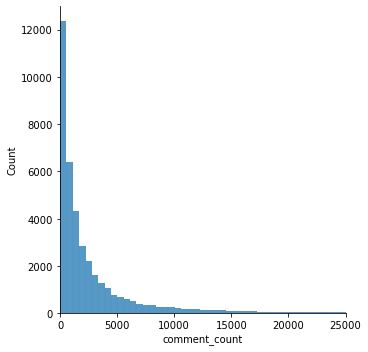

In [78]:
canada = canada.dropna(subset=['comment_count'])
sns.displot(canada['comment_count'], bins=2000)
plt.xlim(0.0, 25000)
print(canada['comment_count'].describe())

count    4.088100e+04
mean     1.147036e+06
std      3.390913e+06
min      7.330000e+02
25%      1.439020e+05
50%      3.712040e+05
75%      9.633020e+05
max      1.378431e+08
Name: views, dtype: float64


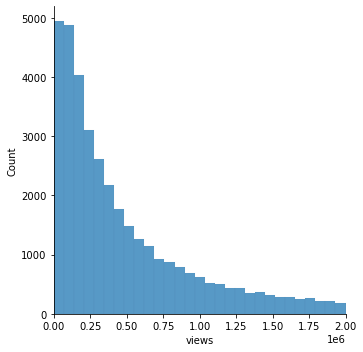

In [111]:
canada = canada.dropna(subset=['views'])
sns.displot(canada['views'], bins=2000)
plt.xlim(0.0, 2000000)
print(canada['views'].describe())

count    4.088100e+04
mean     3.958269e+04
std      1.326895e+05
min      0.000000e+00
25%      2.191000e+03
50%      8.780000e+03
75%      2.871700e+04
max      5.053338e+06
Name: likes, dtype: float64


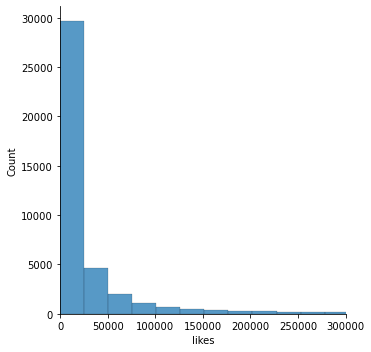

In [113]:
canada = canada.dropna(subset=['likes'])
sns.displot(canada['likes'], bins=200)
plt.xlim(0.0, 300000)
print(canada['likes'].describe())

count    4.088100e+04
mean     2.009195e+03
std      1.900837e+04
min      0.000000e+00
25%      9.900000e+01
50%      3.030000e+02
75%      9.500000e+02
max      1.602383e+06
Name: dislikes, dtype: float64


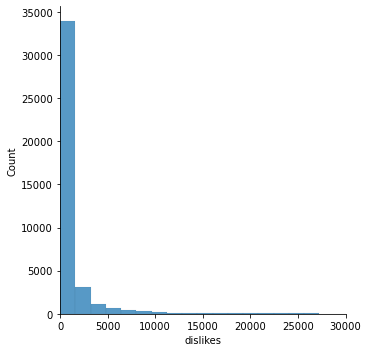

In [119]:
canada = canada.dropna(subset=['dislikes'])
sns.displot(canada['dislikes'], bins=1000)
plt.xlim(0.0, 30000)
print(canada['dislikes'].describe())

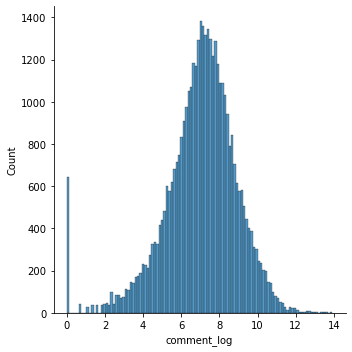

In [151]:
canada['comment_log'] = np.log(canada['comment_count'] + 1)
sns.displot(canada['comment_log'])
ax.set_yscale('log')

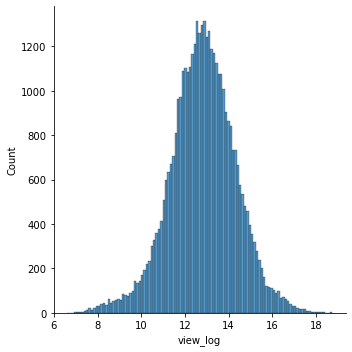

In [150]:
canada['view_log'] = np.log(canada['views'] + 1)
sns.displot(canada['view_log'])
ax.set_yscale('log')

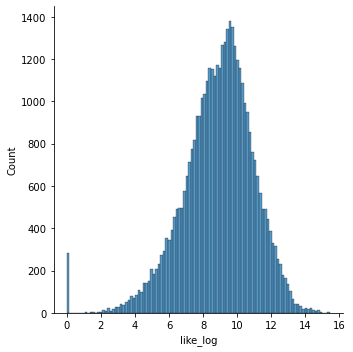

In [149]:
canada['like_log'] = np.log(canada['likes'] + 1)
sns.displot(canada['like_log'])
ax.set_yscale('log')

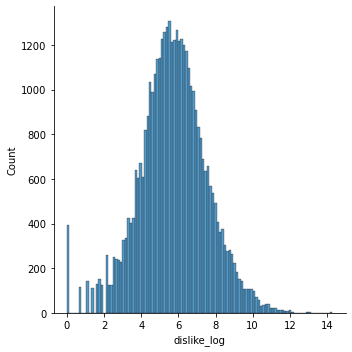

In [148]:
canada['dislike_log'] = np.log(canada['dislikes'] + 1)
sns.displot(canada['dislike_log'])
ax.set_yscale('log')

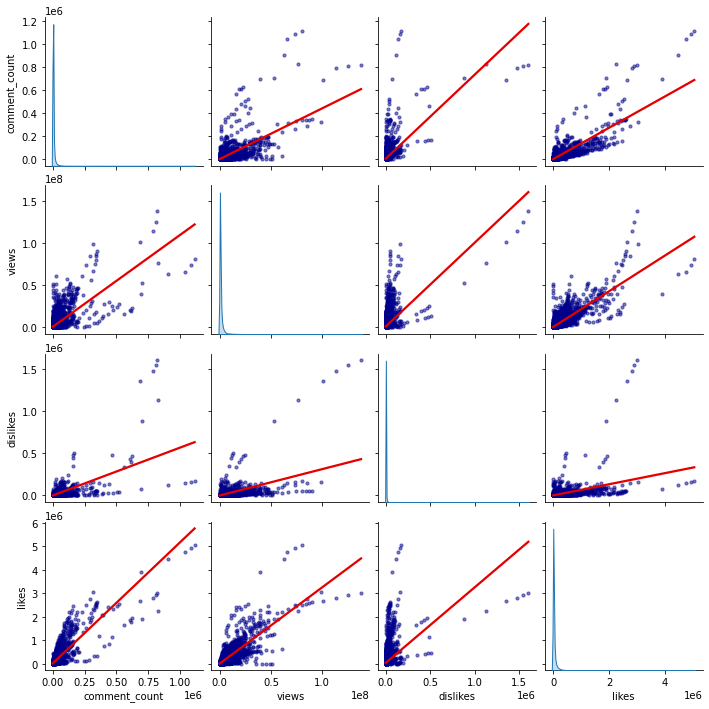

In [141]:
sns.pairplot(canada, vars=['comment_count', 'views', 'dislikes', 'likes'], diag_kind='kde', kind='reg',\
             plot_kws={'ci':None, 'color':'xkcd:red', 'scatter_kws':{'color':'darkblue', 's':10, 'alpha': 0.5}})

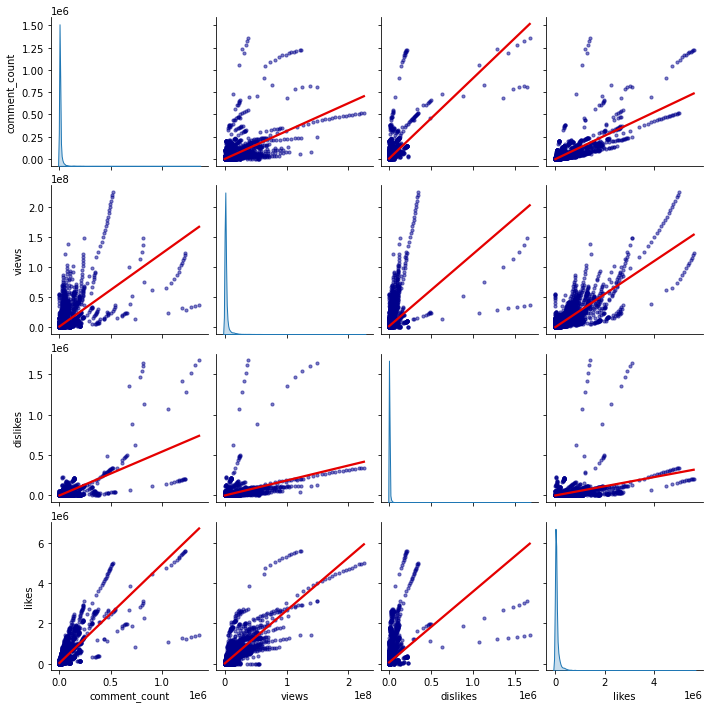

In [142]:
sns.pairplot(unitedstates, vars=['comment_count', 'views', 'dislikes', 'likes'], diag_kind='kde', kind='reg',\
             plot_kws={'ci':None, 'color':'xkcd:red', 'scatter_kws':{'color':'darkblue', 's':10, 'alpha': 0.5}})

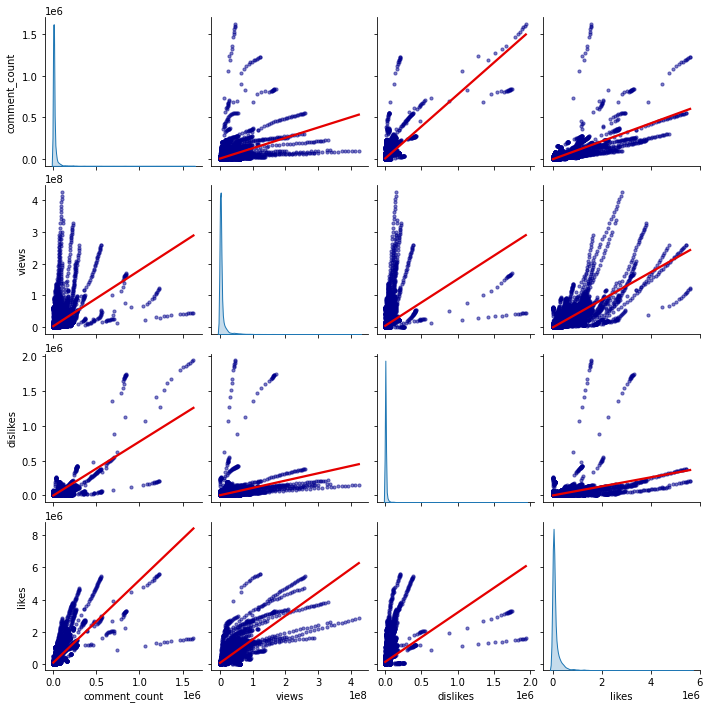

In [143]:
sns.pairplot(britain, vars=['comment_count', 'views', 'dislikes', 'likes'], diag_kind='kde', kind='reg',\
             plot_kws={'ci':None, 'color':'xkcd:red', 'scatter_kws':{'color':'darkblue', 's':10, 'alpha': 0.5}})

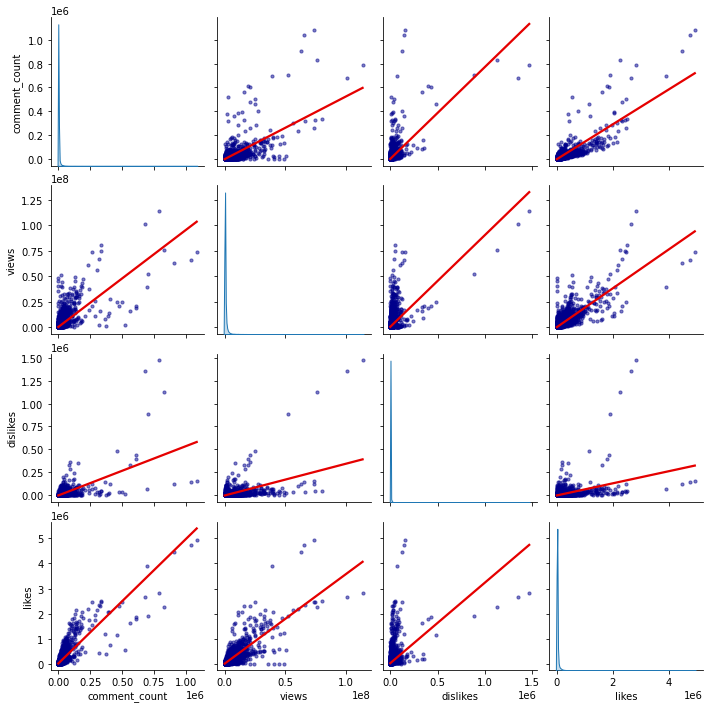

In [144]:
sns.pairplot(germany, vars=['comment_count', 'views', 'dislikes', 'likes'], diag_kind='kde', kind='reg',\
             plot_kws={'ci':None, 'color':'xkcd:red', 'scatter_kws':{'color':'darkblue', 's':10, 'alpha': 0.5}})

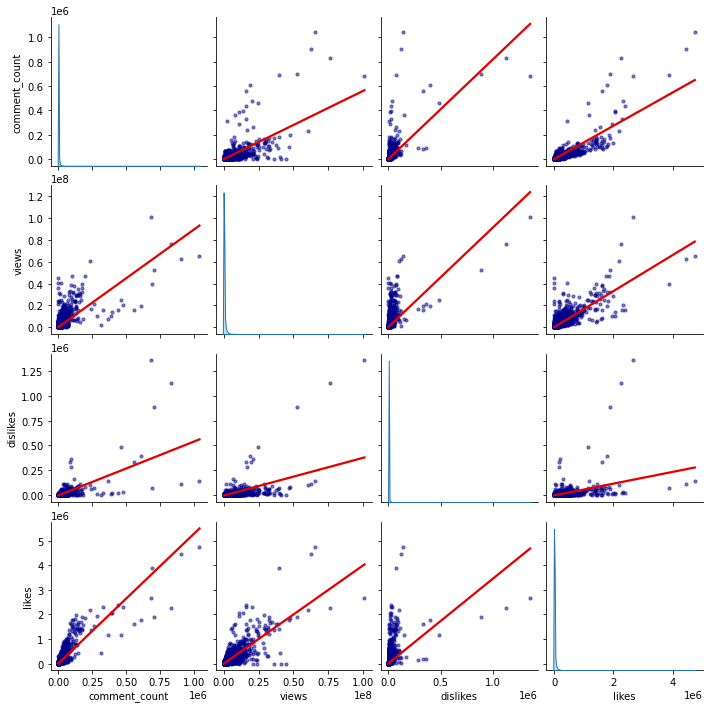

In [145]:
sns.pairplot(france, vars=['comment_count', 'views', 'dislikes', 'likes'], diag_kind='kde', kind='reg',\
             plot_kws={'ci':None, 'color':'xkcd:red', 'scatter_kws':{'color':'darkblue', 's':10, 'alpha': 0.5}})

1. Plot histograms for these metrics for Canada. What can you say about them? 
     * Comment Count - 75% of the videos in the dataset has less than 4000 comments. The histogram shows right skewed distribution. 
     * Views - 75% of the videos have less than 1 million views. The histogram for views is right skewed distribution. 
     * Likes - 75% of the video has less than 35000 likes. The histogram for likes is right skewed distribution. 
     * Dislikes - 75% of the video has less than 9500 dislikes. The histogram fior dislikes is right skewed distribution. 
     
2. Try to apply a log transformation, and plot the histograms again. How do they look now?
    * All three plots ( comments, views, and dislikes) shows normal distribution after log transformation. 
    * There are outliers in comments, dislikes and likes plots.
    * The log tranformation plot for "like" variable is midly left skewed. 
   
3. Create a pairplot for Canada, as we did in this week's class. Do you see anything interesting?
    *  The pairplots shows positive correlation between all the four variables (Comment counts, views, likes and dislikes). 
4. Create additional pairplots for the other four regions. Do they look similar?
    * The pairplots for all five regions looks similar. The pairplots of all five countries show positive correlation between all the four variables (Comment counts, views, likes and dislikes). 

### <span style="color:magenta"> Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice </span>

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Experiment with colormaps that are different from the default one and choose one that you think is best.  Comment on why you think so.
* Are there any interesting correlations? What are they?

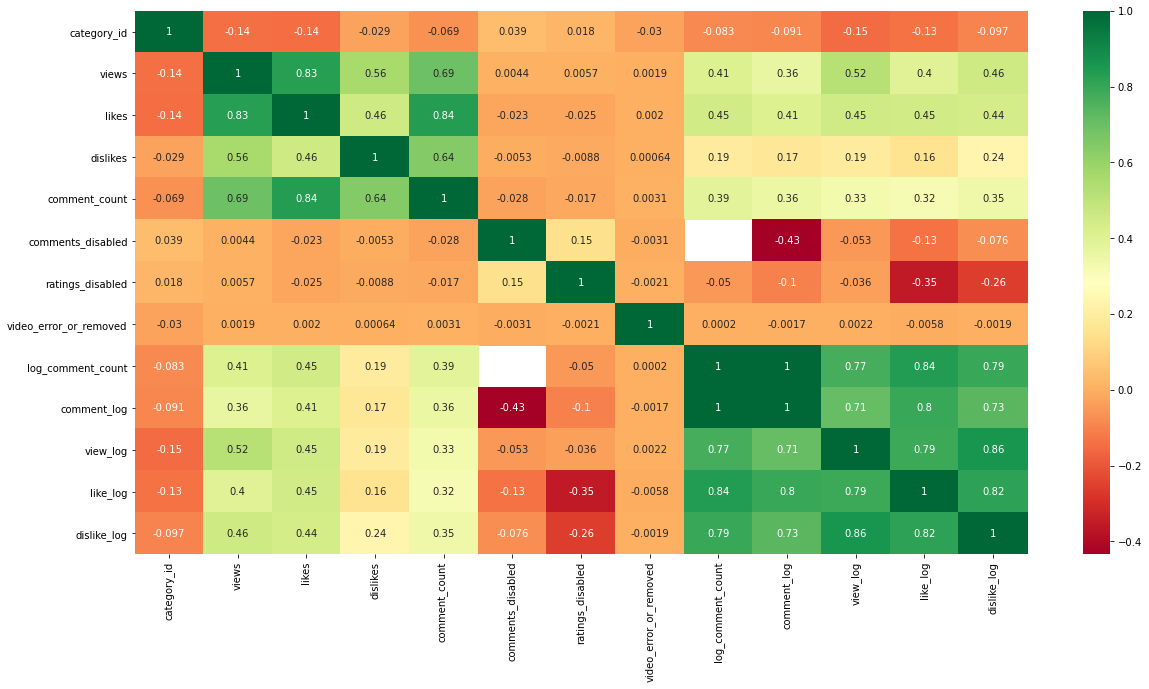

In [158]:
can_corr = canada.corr()
plt.figure(figsize=(20,10))
g = sns.heatmap(can_corr, annot=True,  cmap="RdYlGn")


* The color map that I have chosen is Red, Yellow, and Green. This color map provides an ideal contrast and is sequential color scale. Therefore, there will be a clear demarcation between high and low values. 
* The correlation between Comment Counts and likes are strong. This is logically true as the comments increases with likes. Also, there is strong correlation between views and likes. The interesting correlation is between dislikes versus comment counts and views. 
* The correlation between dislike and comment count is 0.64. This means that the comment counts and views increases with increase in dislikes. 


### <span style="color:magenta"> Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice </span>
* Use statsmodels to perform an ANOVA (categorical regression) of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. Note that you need to use a categorical variable as your independent variable.
* Provide your interpretation of the results. 
* Create two different regression models where the dependent variable is the same, and the independent variables are different.  Note that your independent variable needs to be a continuous numerical variables. What does your interpretation say about the two models?

In [40]:
canada.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [110]:
model1 = smf.ols('dislikes ~ C(category_id)', data=canada).fit()
aov_table = sm.stats.anova_lm(model1,typ=2) 
print(aov_table) 
model1.summary()

                      sum_sq       df          F        PR(>F)
C(category_id)  1.388382e+11     16.0  24.234315  3.135520e-72
Residual        1.463185e+13  40864.0        NaN           NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               dislikes   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     24.23
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           3.14e-72
Time:                        17:03:32   Log-Likelihood:            -4.6060e+05
No. Observations:               40881   AIC:                         9.212e+05
Df Residuals:                   40864   BIC:                         9.214e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1510.3199    416.913      3.623      0.000     693.161    2327.479
C(category_id)[T.2]   -950.0479   1090.026     -0.872      0.383   -3086.523    1186.427
C(category_id)[T.10]  4412.5399    519.409      8.495      0.000    3394.486    5430.593
C(category_id)[T.15] -1008.9568   1069.661     -0.943      0.346   -3105.516    1087.602
C(category_id)[T.17]  -331.1419    549.811     -0.602      0.547   -1408.784     746.500
C(category_id)[T.19] -1179.0418   1042.708     -1.131      0.258   -3222.773     864.689
C(category_id)[T.20]   310.2768    663.500      0.468      0.640    -990.197    1610.751
C(category_id)[T.22]   799.2528    510.923      1.564      0.118    -202.168    1800.673
C(category_id)[T.23]   -86.3827    518.380     -0.167      0.868   -1102.419     929.653
C(category_id)[T.24]   407.1274    447.701      0.909      0.363    -470.377    1284.631
C(category_id)[T.25]  -725.5060    509.814     -1.423      0.155   -1724.752     273.740
C(category_id)[T.26]  -648.0778    593.484     -1.092      0.275   -1811.319     515.164
C(category_id)[T.27]  -709.6660    731.526     -0.970      0.332   -2143.473     724.141
C(category_id)[T.28]    40.4619    695.577      0.058      0.954   -1322.884    1403.808
C(category_id)[T.29]  2.992e+04   2238.860     13.364      0.000    2.55e+04    3.43e+04
C(category_id)[T.30]   536.3468   7736.331      0.069      0.945   -1.46e+04    1.57e+04
C(category_id)[T.43]  -539.0618   1749.690     -0.308      0.758   -3968.492    2890.368
==============================================================================
Omnibus:                   136391.549   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      32174101580.279
Skew:                          59.257   Prob(JB):                         0.00
Kurtosis:                    4347.467   Cond. No.                         89.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The alpha value I consider for my interpretation is 0.05. The prob(F statistic) < 0.05. Therefore,there is significant difference between number of dislikes at different category ID levels. 

In [166]:
model2 = smf.ols('comment_count ~ views', data=canada).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comment_count   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 3.779e+04
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:59:36   Log-Likelihood:            -4.5260e+05
No. Observations:               40881   AIC:                         9.052e+05
Df Residuals:                   40879   BIC:                         9.052e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.3448     81.215     -0.201      0.841    -175.529     142.839
views          0.0044   2.27e-05    194.408      0.000       0.004       0.004
==============================================================================
Omnibus:                    90345.732   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1028714456.234
Skew:                          20.184   Prob(JB):                         0.00
Kurtosis:                     779.078   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
model3 = smf.ols('comment_count ~ dislikes', data=canada).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comment_count   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                 2.889e+04
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:59:47   Log-Likelihood:            -4.5505e+05
No. Observations:               40881   AIC:                         9.101e+05
Df Residuals:                   40879   BIC:                         9.101e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3575.2193     82.150     43.521      0.000    3414.204    3736.235
dislikes       0.7305      0.004    169.972      0.000       0.722       0.739
==============================================================================
Omnibus:                    99775.829   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2487010641.527
Skew:                          25.569   Prob(JB):                         0.00
Kurtosis:                    1210.242   Cond. No.                     1.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* There is sequential relationship between views, dislikes and comments. Views may lead to both dislike and comments and dislike may lead to comments. Hence, Model 2 tests how views impacts the number of comments. Model 3 tests how dislikes impacts number of comments. 
* In Model 2, the R square value is 0.48, and the F stat is 3.779e+04, which is significant with a p-value of 0.0. This shows that the model is significant. The variable views has a statistically significant impact on comment counts with a p-value of 0.0. The coefficient is 0.0044, which shows that the number of views positively impacts number of comments. 
* In Model 3, the R square value is 0.414, and the F stat is 2.889e+04, which is significant with a p-value of 0.0. This shows that the model is significant. The variable dislikes has a statistically significant impact on comment counts with a p-value of 0.0. The coefficient is 0.7305, which shows that the number of dislikes positively impacts number of comments. 
* Comparing model 2 and 3, the coefficient value of views variable is much lower than the coefficient value of dislikes variable. This is intuitive as dislikes may often lead to a series of discussion and comments. Whereas, views may not always lead to comments. 

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)* </span>
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### <span style="color:magenta"> Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). </span>

* Which pairs have the most/least correlation coefficients?

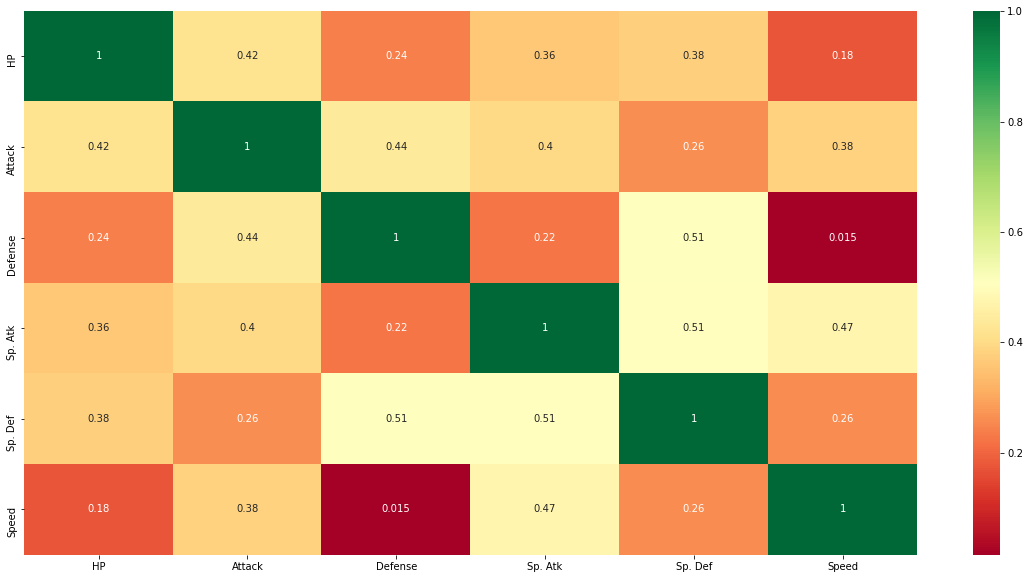

In [174]:
pokemon = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/Pokemon.csv")
plt.figure(figsize=(20,10))
pok_corr = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
m = sns.heatmap(pok_corr, annot=True, cmap="RdYlGn")

* The smallest correlation cofficient is seen between defense and speed. 
* The largest correlation coefficient is seen between two pairs:
    a. between defense and special defense.
    b. between special attack and special defense. 

### <span style="color:magenta"> Q5. For 15 Points: Plot the distribution of ability points per Pokémon type </span>

* How would you describe each Pokémon type with different ability points?

In [169]:
plt.figure(figsize=(20,6))
pokemon_stats_by_generation = pokemon[['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_stats_by_generation = pokemon_stats_by_generation.reset_index()

<Figure size 1440x432 with 0 Axes>

In [211]:
Pokemon_1 = pokemon_stats_by_generation.melt(id_vars='Type 1')
Pokemon_1 = Pokemon_1[Pokemon_1['variable'] != 'index']

In [212]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'The distribution of ability points (for different Pokemon Type)')

<Figure size 1440x432 with 0 Axes>

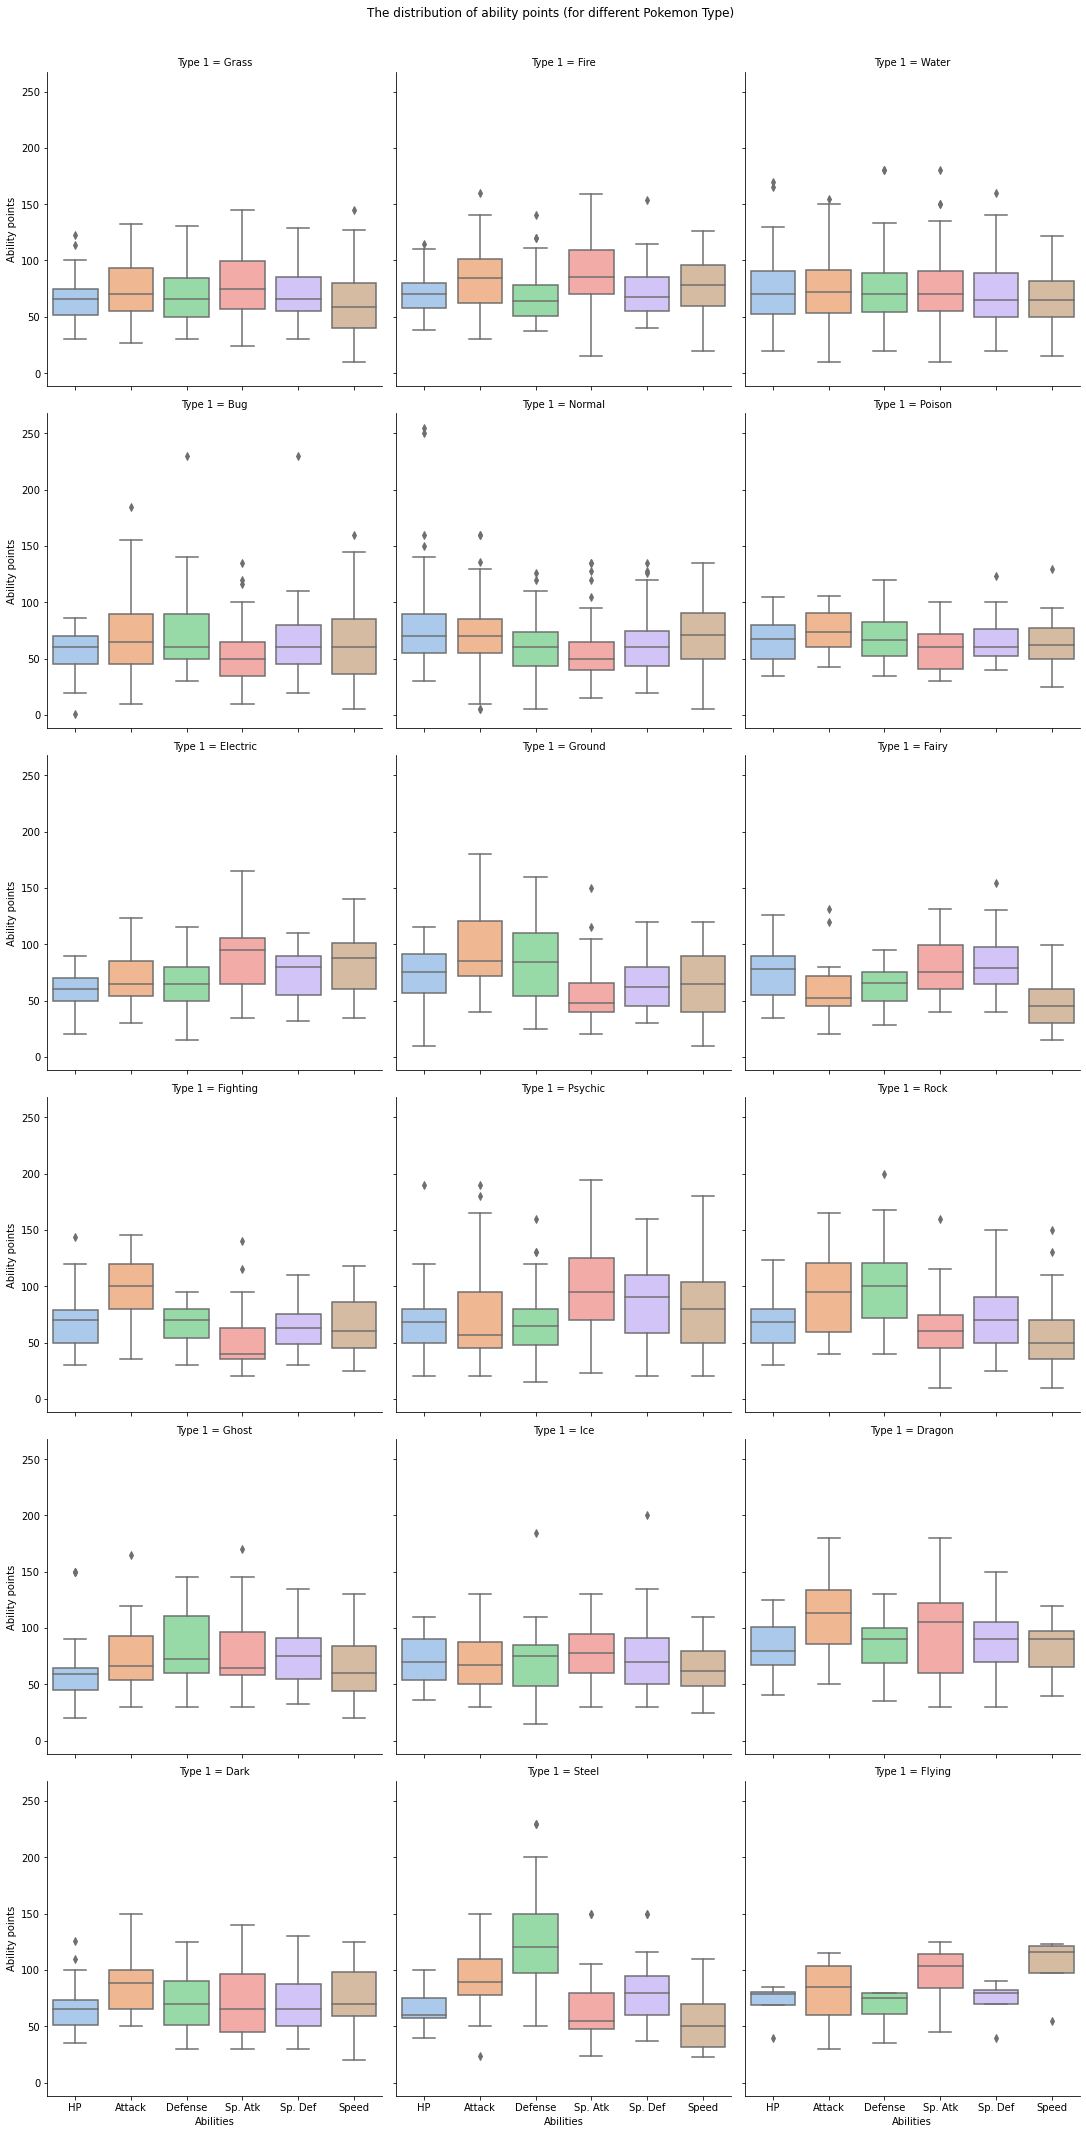

In [235]:
plt.figure(figsize=(20,6))
g = sns.catplot(
    data=Pokemon_1, x='variable', y='value',
    col='Type 1', kind='box', col_wrap=3, palette='pastel'
)
g.set_xlabels("Abilities")
g.set_ylabels("Ability points")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('The distribution of ability points (for different Pokemon Type)')

* How would you describe each Pokémon type with different ability points?
     * Type - Dark - Strength of this pokemon is the speed. This pokemon has a weak HP. 
     * Type - Steel - Strength of this pokemon is the defense. The weakest ability is speed.  
     * Type - Flying - Strength of this pokemon is the speed followed by special attack. The weakest abilities are HP, defense and special defense. 
     * Type - Ghost - Strength of this pokemon is the defense. The weakest ability is HP. 
     * Type - Ice - This pokemon has equal ability points in all of its abilities. The special attack ability of Ice pokemon is midly stronger than its other abilities. This pokemon's ability is similar to water type pokemon. 
     * Type - Dragon - Strength of this pokemon is the attack followed by special attack. The weakest ability is HP. 
     * Type - Electric - Strength of this pokemon is the special attack. The weakest ability is HP. 
     * Type - Ground -Strength of this pokemon is the attack followed by defense. The weakest ability is special attack. 
     * Type - Fairy - Strength of this pokemon is the special attack followed by special defense. The weakest ability is speed. 
     * Type - Fighting - Strength of this pokemon is attack. The weakest ability is special attack. 
     * Type - Psychic - Strength of this pokemon is the special attack followed by special defense and speed. The weakest ability is defense. 
     * Type - Rock - Strength of this pokemon is the attack followed by defense. The weakest ability is special attack. 
     * Type - Grass - Strength of this pokemon is the attack followed by special attack. The weakest abilities are speed and HP. 
     * Type - Fire - Strength of this pokemon is the special attack. The weakest ability is defense.  
     * Type - Water - This pokemon has equal ability points in all of its abilities. The speed ability of Water pokemon is midly weaker than its other abilities. 
     * Type - Bug - Strength of this pokemon is the attack and defense. The weakest abilities are HP and special defense. 
     * Type - Normal - Strength of this pokemon is HP followed by speed. The weakest ability is special attack. 
     * Type - Poison - Strength of this pokemon is the attack followed by defense. TThe weakest ability is special attack. 

### <span style="color:magenta"> Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other? </span>

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

Text(0, 0.5, 'Ability points')

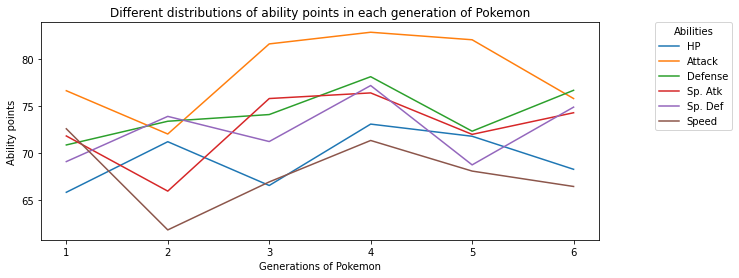

In [65]:
pokemon_stats_by_generation_1 = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

pokemon_stats_by_generation_1.plot.line(figsize=(10,4))
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0., title="Abilities")
plt.xlabel("Generations of Pokemon")
plt.title("Different distributions of ability points in each generation of Pokemon")
plt.ylabel("Ability points")

* As confirmed from the line plot above, there is difference in distribution of ability points in each generation of Pokemon. 
* We can see a decrease in HP in third generation and again it was increased in fourth and fifth generation and gradually decreased in sixth generation. 
* The Attack ability of the pokemon has decreased in the second generation ( as compared to first generation) and it was increased in third to fifth generation and finally decreased in sixth generation. 
* Defense ability has been gradually increased in subsequent generation (first to fourth) and then decreased in fifth generation. It was again increased in sixth generation. 
* Special attack was decreased in second generation (as compared to first generation) and then gradually increased from third to fourth generation. We can see a dip in special attack in fifth generation. 
* Special defense was alternated between generation. It was decreased in third and fifth generation and increased in second, fourth and sixth generation. 
* Speed was decreased drastically in second generation and was gradually increased from third to fifth generation. 

* When we analyse the ability points in generation, we can see that :
    * Second generation : Decrease in speed, special attack and attack. Increase in Special defense, defense and HP. 
    * Third generation: Decrease in HP, Special defense and mild decrease in defense. Increase in attack, special attack, and speed. 
    * Fourth generation: Increase in Speed, HP, special defense, and defense. Attack and special attack are almost unchanged. 
    * Fifth generation: Decrease in HP, Speed, special defense, special attack, defense. The attack ability was almost unchanged. 
    * Sixth generation: Decrease in Speed, HP, and attack. Increase in special attack, special defense and defense. 
    
    
* From the above analysis we can interpret that, second and fourth generation had good defense abilities. Whereas, the first, and third had good attack abilities. 